# 7136COMP - Project Dissertation

## AI assistant coach for analysing football players and teams using Machine Learning

### Shooting Dataset:

In [1]:
# Common imports
import sklearn; print("version: ",sklearn.__version__) # to check the version

import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# To plot figures
import matplotlib.pyplot as plt
# tells jupyter to set up Matplotlib so it uses Jupyter's own backend
%matplotlib inline 

# To save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

version:  0.24.2


## Dataset

In [2]:
# To import the dataset
shooting_data = pd.read_csv("./LFC_Data/3_Liv_Shooting_Fix_merge.csv")

In [3]:
# To take a quick look at the data structure
shooting_data.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,0.48,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,0.38,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,0.38,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,0.13,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,0.33,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2


In [4]:
# To show the meaning of the features/columns
data_dict = pd.read_csv("./LFC_Data/3_Data_dictionary.csv")
data_dict

,Column Name,Description
0,Season,Year where the data belongs to
1,Player,Name of the player
2,Nation,Nationality of the player
3,Pos,Position of the player
4,Age,Age at the season start for league play
5,90s,Minutes played divided by 90
6,Gls,Goals scored or allowed
7,Sh,Shots Total
8,SoT,Shots on target
9,SoT%,Shots on target percentage


In [5]:
# To check the concise summary of the features
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   129 non-null    int64  
 1   Player   129 non-null    object 
 2   Nation   129 non-null    object 
 3   Pos      129 non-null    object 
 4   Age      129 non-null    int64  
 5   90s      129 non-null    float64
 6   Gls      129 non-null    int64  
 7   Sh       129 non-null    int64  
 8   SoT      129 non-null    int64  
 9   SoT%     111 non-null    float64
 10  Sh/90    129 non-null    float64
 11  SoT/90   129 non-null    float64
 12  G/Sh     111 non-null    float64
 13  G/SoT    101 non-null    float64
 14  Dist     111 non-null    float64
 15  FK       129 non-null    int64  
 16  PK       129 non-null    int64  
 17  PKatt    129 non-null    int64  
 18  xG       129 non-null    float64
 19  npxG     129 non-null    float64
 20  npxG/Sh  111 non-null    float64
 21  G-xG     129 non

In [6]:
# To generate the descriptive statistics 
shooting_data.describe()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,111.000000,129.000000,129.000000,111.000000,101.000000,111.000000,129.000000,129.000000,129.000000,129.000000,129.000000,111.000000,129.000000,129.000000
mean,2019.038760,25.294574,16.201550,3.178295,24.209302,8.558140,31.461261,1.583101,0.607674,0.106577,0.335446,16.939640,0.689922,0.209302,0.224806,3.006977,2.834109,0.103333,0.171318,0.134884
std,1.443753,3.941770,12.154294,5.706972,31.874675,13.369688,19.626476,1.555007,1.072037,0.126760,0.271726,5.301908,2.224854,0.853983,0.912074,5.195629,4.789515,0.065190,1.430483,1.436285
min,2017.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-4.500000,-4.500000
25%,2018.000000,23.000000,4.200000,0.000000,4.000000,1.000000,20.000000,0.520000,0.060000,0.000000,0.140000,13.500000,0.000000,0.000000,0.000000,0.300000,0.300000,0.060000,-0.400000,-0.500000
50%,2019.000000,26.000000,14.000000,1.000000,12.000000,4.000000,30.000000,1.060000,0.280000,0.090000,0.330000,17.200000,0.000000,0.000000,0.000000,1.200000,1.100000,0.090000,0.000000,0.000000
75%,2020.000000,28.000000,28.200000,3.000000,30.000000,9.000000,39.300000,2.600000,0.900000,0.155000,0.500000,20.400000,0.000000,0.000000,0.000000,2.600000,2.500000,0.135000,0.600000,0.500000
max,2021.000000,35.000000,38.000000,32.000000,142.000000,65.000000,100.000000,10.000000,10.000000,1.000000,1.000000,30.000000,16.000000,6.000000,6.000000,24.400000,22.900000,0.450000,7.600000,8.100000


In [7]:
# To check the distribution of the data
shooting_data["Season"].value_counts()

2020    28
2017    27
2021    27
2019    24
2018    23
Name: Season, dtype: int64

In [8]:
# To check the null value
shooting_data.isnull().sum()

Season      0
Player      0
Nation      0
Pos         0
Age         0
90s         0
Gls         0
Sh          0
SoT         0
SoT%       18
Sh/90       0
SoT/90      0
G/Sh       18
G/SoT      28
Dist       18
FK          0
PK          0
PKatt       0
xG          0
npxG        0
npxG/Sh    18
G-xG        0
np:G-xG     0
dtype: int64

# Data Preprocessing
## EDA and Data Cleaning

In [9]:
# To check the shape of the data
shooting_data.shape

(129, 23)

In [10]:
# To fill the null values with 0 since players were not playing the games
new_shoot_data = shooting_data.copy()

new_shoot_data.fillna(value=0, inplace=True)

In [11]:
# To check the null data again
new_shoot_data.isnull().sum()

Season     0
Player     0
Nation     0
Pos        0
Age        0
90s        0
Gls        0
Sh         0
SoT        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      0
Dist       0
FK         0
PK         0
PKatt      0
xG         0
npxG       0
npxG/Sh    0
G-xG       0
np:G-xG    0
dtype: int64

In [12]:
# To check the info of new_shoot_data
new_shoot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   129 non-null    int64  
 1   Player   129 non-null    object 
 2   Nation   129 non-null    object 
 3   Pos      129 non-null    object 
 4   Age      129 non-null    int64  
 5   90s      129 non-null    float64
 6   Gls      129 non-null    int64  
 7   Sh       129 non-null    int64  
 8   SoT      129 non-null    int64  
 9   SoT%     129 non-null    float64
 10  Sh/90    129 non-null    float64
 11  SoT/90   129 non-null    float64
 12  G/Sh     129 non-null    float64
 13  G/SoT    129 non-null    float64
 14  Dist     129 non-null    float64
 15  FK       129 non-null    int64  
 16  PK       129 non-null    int64  
 17  PKatt    129 non-null    int64  
 18  xG       129 non-null    float64
 19  npxG     129 non-null    float64
 20  npxG/Sh  129 non-null    float64
 21  G-xG     129 non

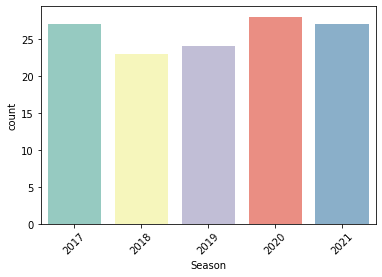

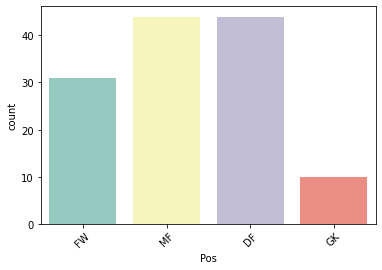

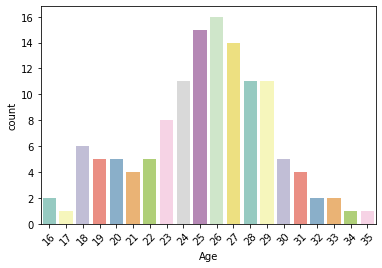

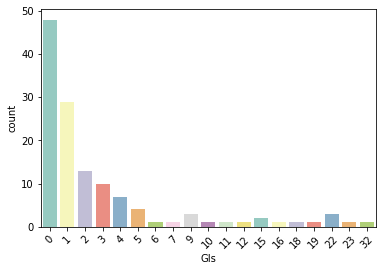

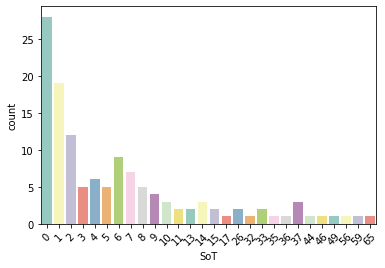

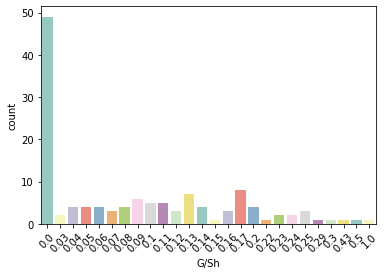

In [43]:
# To loop through all important features to see if there is relationship 
features = ['Season','Pos','Age','Gls','SoT','G/Sh']
for f in features:
    sns.countplot(data=new_shoot_data, x=f, palette='Set3')
    plt.xticks(rotation=45)
    plt.show()

The above plot shows a lot of relation between different features such as the total shots, shots on target and so on.

In [14]:
new_shoot_data.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,0.48,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,0.38,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,0.38,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,0.13,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,0.33,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2


<AxesSubplot:xlabel='Pos', ylabel='SoT'>

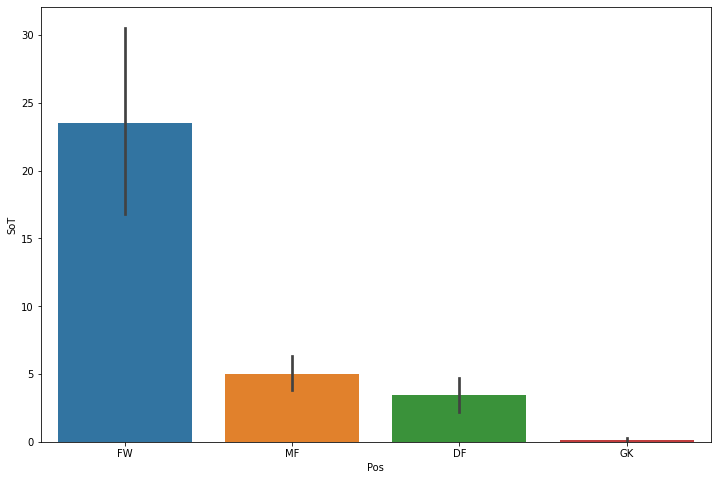

In [15]:
# To see which players position has the most shots on target
plt.figure(figsize=(12,8))
sns.barplot(data=new_shoot_data, x='Pos', y='SoT')

<AxesSubplot:xlabel='Age', ylabel='SoT'>

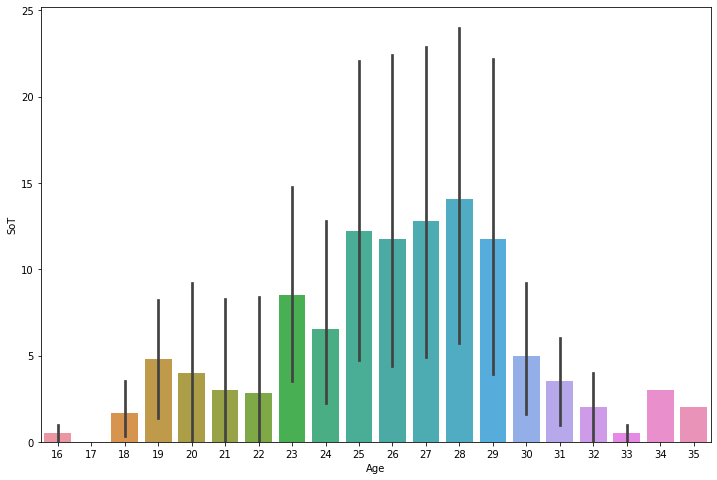

In [25]:
# To see which age group has the most shots on target 
plt.figure(figsize=(12,8))
sns.barplot(data=new_shoot_data, x='Age', y='SoT')

<AxesSubplot:xlabel='Gls', ylabel='Player'>

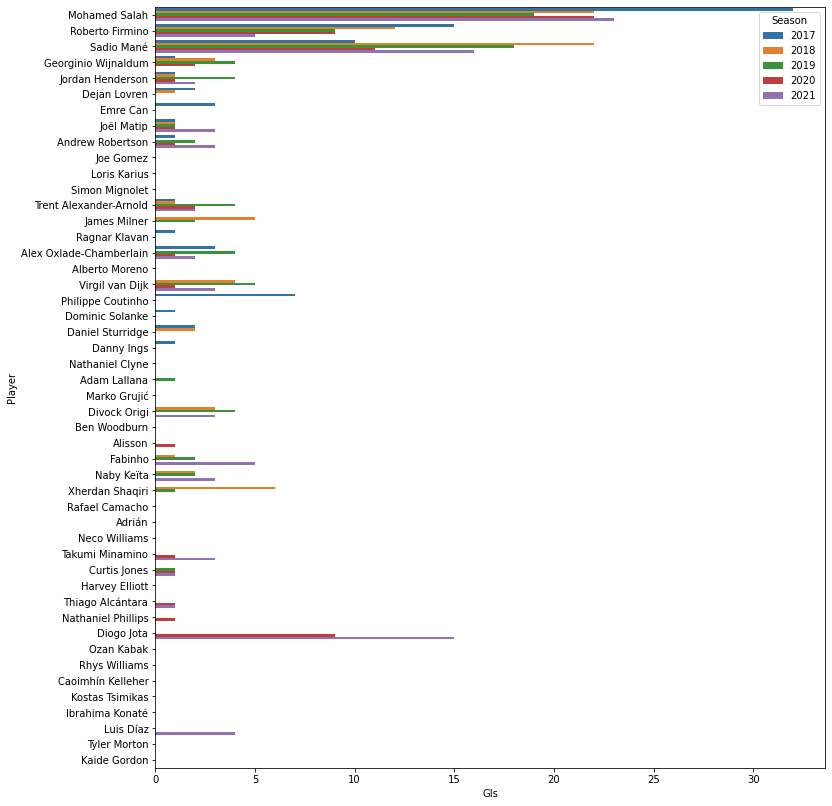

In [32]:
# To see all the players goal scoring record in every season
plt.figure(figsize=(12, 14))
sns.barplot(data=new_shoot_data, x='Gls', y='Player', hue='Season')

<AxesSubplot:xlabel='Gls', ylabel='Dist'>

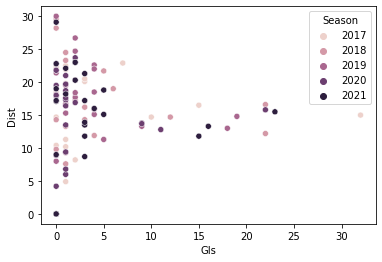

In [30]:
# To show the relation between number of goals scored and the distance from which the goal was scored
sns.scatterplot(data=new_shoot_data, x='Gls', y='Dist', hue='Season')

Shows that most of the goals that were scored were from the 10 to 20 yrds.

# Feature Engineering

In [37]:
new_shoot_data.shape

(129, 23)

In [38]:
new_shoot_data.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,0.48,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,0.38,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,0.38,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,0.13,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,0.33,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2


In [40]:
# To see the correlation between the features using correlation matrix
corr_data = new_shoot_data.corr()
corr_data

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
Season,1.000000,0.058381,-0.036110,-0.012223,0.011027,-0.016105,-0.027590,0.090075,0.093894,0.036515,-0.013521,0.002976,-0.071627,0.050397,0.046727,0.016940,0.011557,0.014270,-0.110294,-0.117074
Age,0.058381,1.000000,0.267096,0.154970,0.156697,0.129386,0.093263,-0.069704,-0.155006,0.207097,0.276996,0.108901,-0.144509,0.188098,0.183530,0.161184,0.147899,0.082060,0.032823,0.010728
90s,-0.036110,0.267096,1.000000,0.489104,0.592459,0.543228,0.152984,-0.076723,-0.099488,0.197277,0.195792,0.136576,0.271042,0.263030,0.267841,0.502704,0.506239,0.050536,0.125437,0.098891
Gls,-0.012223,0.154970,0.489104,1.000000,0.931498,0.963519,0.322186,0.454036,0.286961,0.302195,0.277280,0.065287,0.164980,0.596616,0.631626,0.969903,0.960331,0.365916,0.466775,0.416317
Sh,0.011027,0.156697,0.592459,0.931498,1.000000,0.979086,0.298546,0.467209,0.253609,0.192457,0.200712,0.172559,0.285808,0.559767,0.585272,0.962381,0.958823,0.314205,0.220803,0.171068
SoT,-0.016105,0.129386,0.543228,0.963519,0.979086,1.000000,0.351516,0.473221,0.295507,0.237908,0.196110,0.105535,0.212827,0.545989,0.573286,0.973673,0.973043,0.346031,0.307541,0.259074
SoT%,-0.027590,0.093263,0.152984,0.322186,0.298546,0.351516,1.000000,0.546407,0.628454,0.566731,0.346259,0.218136,0.047077,0.098056,0.103210,0.297242,0.307622,0.696888,0.205767,0.196068
Sh/90,0.090075,-0.069704,-0.076723,0.454036,0.467209,0.473221,0.546407,1.000000,0.850805,0.170100,0.145720,0.307747,0.111969,0.234244,0.250193,0.467978,0.471305,0.675286,0.111660,0.093162
SoT/90,0.093894,-0.155006,-0.099488,0.286961,0.253609,0.295507,0.628454,0.850805,1.000000,0.127016,0.059391,0.125218,0.028782,0.132550,0.143241,0.283411,0.286724,0.715033,0.115473,0.105280
G/Sh,0.036515,0.207097,0.197277,0.302195,0.192457,0.237908,0.566731,0.170100,0.127016,1.000000,0.760202,-0.011500,0.003369,0.066371,0.073724,0.230646,0.239573,0.458824,0.367894,0.362392


Saving figure 03_corr_heatmap


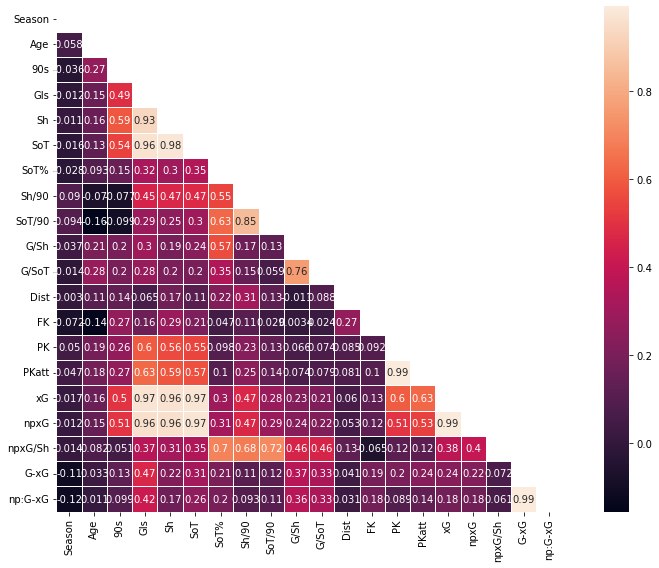

In [41]:
# To visualize in a better way
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, mask=mask, linewidths=.5, annot=True, square=True)
save_fig("03_corr_heatmap")

With the help of correlation matrix I will remove the features that are having high correlation and also other features that are not important to the dataset. 

# K-Means Clustering without PCA

In [44]:
new_shoot_data.shape

(129, 23)

In [45]:
# Creating new copy of data for doing the cluster operation
clus_data = new_shoot_data.copy()

# To remove the unwanted features from the dataset
clus_data.drop(['Player','Nation','Pos','PKatt'], axis=1, inplace=True)

In [46]:
clus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   129 non-null    int64  
 1   Age      129 non-null    int64  
 2   90s      129 non-null    float64
 3   Gls      129 non-null    int64  
 4   Sh       129 non-null    int64  
 5   SoT      129 non-null    int64  
 6   SoT%     129 non-null    float64
 7   Sh/90    129 non-null    float64
 8   SoT/90   129 non-null    float64
 9   G/Sh     129 non-null    float64
 10  G/SoT    129 non-null    float64
 11  Dist     129 non-null    float64
 12  FK       129 non-null    int64  
 13  PK       129 non-null    int64  
 14  xG       129 non-null    float64
 15  npxG     129 non-null    float64
 16  npxG/Sh  129 non-null    float64
 17  G-xG     129 non-null    float64
 18  np:G-xG  129 non-null    float64
dtypes: float64(12), int64(7)
memory usage: 19.3 KB


In [47]:
# To standardize the data first and then use the scaled data for all clustering work
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(clus_data)

In [48]:
# To see the scaled data after standarizing
df_scaled_data = pd.DataFrame(scaled_data)
col_list = list(clus_data.columns)
df_scaled_data.columns = col_list
df_scaled_data.head()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,-1.41763,-0.075023,1.329671,5.069952,3.709839,4.238088,0.885534,1.818565,1.313194,1.045248,0.786608,0.055476,1.493573,0.929503,4.133557,4.205879,1.014904,5.213376,5.567259
1,-1.41763,-0.075023,1.197517,2.079526,1.883119,2.135633,0.800426,0.746884,0.564042,0.637885,0.424723,0.251722,-0.311307,0.929503,1.756953,1.795440,0.729358,1.914962,1.723006
2,-1.41763,-0.075023,0.668901,1.199989,1.442186,1.309669,0.474178,0.837266,0.432940,0.393468,0.424723,0.016227,-0.311307,-0.246045,1.428479,1.585837,0.872131,-0.400945,-0.373860
3,-1.41763,0.179660,0.850613,-0.383178,0.434341,-0.041909,-0.282337,-0.098840,-0.288119,-0.502729,-0.479988,0.487217,0.139913,-0.246045,-0.097958,-0.070030,-0.270051,-1.172915,-1.142710
4,-1.41763,0.434342,0.652382,-0.383178,-0.290049,-0.417348,-0.334348,-0.621769,-0.456678,-0.176840,0.243781,1.036705,0.139913,-0.246045,-0.387788,-0.426356,-0.555596,-0.120229,0.045513


In [49]:
# To calculate the inertia using KMeans for plotting elbow curve
from sklearn.cluster import KMeans

kmeans_clus = [KMeans(n_clusters=i, random_state=42).fit(df_scaled_data) for i in range(1,11)]
inertia = [mod.inertia_ for mod in kmeans_clus]

Inertia is within-cluster sum of squares criterian. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Eucledian distances between inflated and no normalisation is applied beforehand; not a normalised metric.

In [50]:
# To see the value of inertia
inertia

[2451.0000000000005,
 1798.9282448947986,
 1536.0348051963372,
 1379.7476671453444,
 1228.242214118051,
 1089.2563185293818,
 968.3127916552236,
 902.8817773552057,
 818.3844239526494,
 765.824463927573]

Saving figure 03_Elbow_point


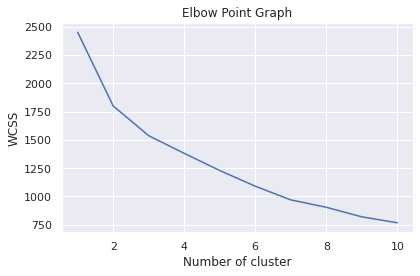

In [51]:
# To plot the elbow curve for knowing the optimal number of clusters
sns.set()
plt.plot(range(1,11), inertia)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
save_fig("03_Elbow_point")
plt.show()

In [52]:
# To check silhouette score
from sklearn.metrics import silhouette_score

sil_scores = [silhouette_score(df_scaled_data, model.labels_) for model in kmeans_clus[1:]]
sil_scores

[0.4471791893991039,
 0.18899887868176418,
 0.18475749638610872,
 0.19656715024207996,
 0.192858179218995,
 0.21173352066618012,
 0.19396645674261967,
 0.1967927517333844,
 0.20178101808433352]

Saving figure 03_Sil_score


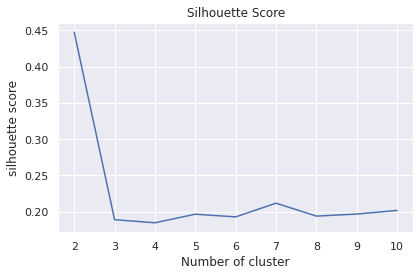

In [53]:
# To show the graphical way of silhoutte score
plt.plot(range(2,11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')
save_fig("03_Sil_score")
plt.show()

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

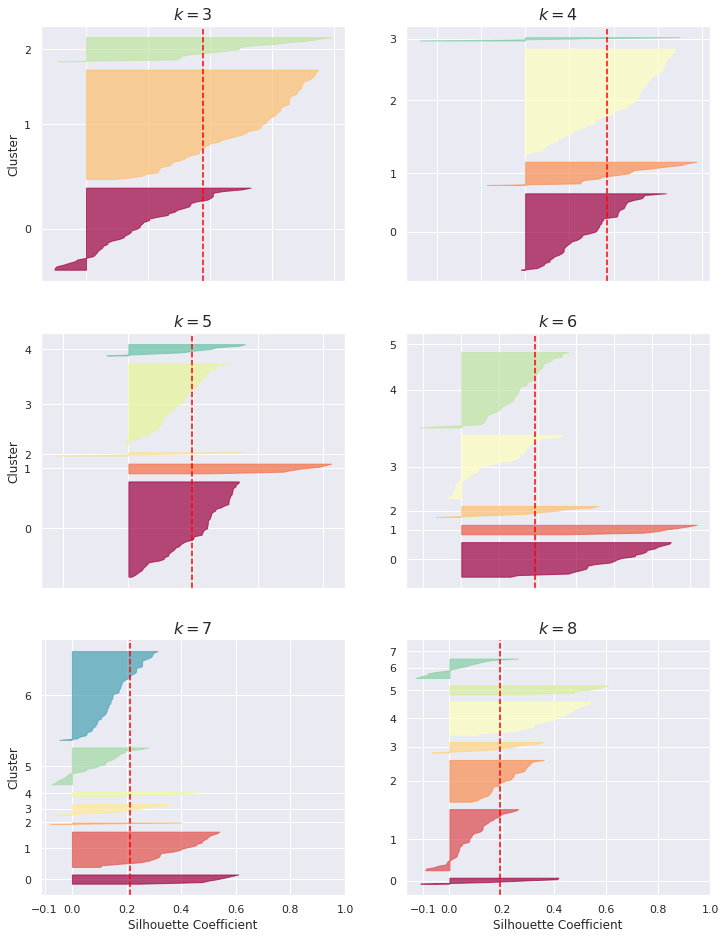

In [58]:
# To plot the silhouette diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib as mpl

plt.figure(figsize=(12,16))

for i in (3,4,5,6,7,8):
    plt.subplot(3,2,i-2)
    
    y_pred = kmeans_clus[i-1].labels_
    sil_coeff = silhouette_samples(df_scaled_data, y_pred)
    
    padding = len(df_scaled_data)//30
    posit = padding
    ticks = []
    for j in range(i):
        coeffs = sil_coeff[y_pred == j]
        coeffs.sort()
        
        color = mpl.cm.Spectral(j / i)
        plt.fill_betweenx(np.arange(posit, posit + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        
        ticks.append(posit+len(coeffs)//2)
        posit+=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(i)))
    
    if i in (3,5,7):
        plt.ylabel("Cluster")
        
    if i in (7,8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=sil_scores[i - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(i), fontsize=16)
    
plt.show()

For n_clusters=3, all the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best number of cluster.

Silhouette analysis can be used to study the separation distance between the resulting clusters and can be considered a better method compared to the Elbow method.

In [59]:
# Running K means in 3 clusters 
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_3.fit(df_scaled_data)

# predictions for new data
pred = kmeans_3.predict(df_scaled_data)

# To check the centers of the cluster
print(kmeans_3.cluster_centers_)

[[ 0.07238307  0.22124032 -0.03805489 -0.0888025  -0.15956861 -0.1553071
   0.53468035  0.27428472  0.30546976  0.66781405  0.84495262  0.14999454
   0.02941032 -0.12609106 -0.21034094 -0.20819743  0.46420886  0.40969405
   0.41638749]
 [-0.0483462  -0.24742294 -0.25655752 -0.49413516 -0.44122551 -0.45662436
  -0.55548297 -0.45421343 -0.38579666 -0.62180464 -0.72996667 -0.10333191
  -0.04057482 -0.20987424 -0.43951121 -0.44602656 -0.56657855 -0.37503301
  -0.35127808]
 [-0.02695114  0.34944769  1.23606188  2.43134053  2.43323465  2.48604206
   0.66047037  1.07226143  0.67391762  0.5129609   0.40301034 -0.04221058
   0.07975051  1.3213525   2.59166235  2.61289337  0.93875807  0.28680915
   0.16200587]]


In [60]:
# To return label for each data point based on their cluster
print(kmeans_3.labels_)

[2 2 2 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 2 1 2 0 2 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 2 2 2 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1
 1 2 1 1 0 2 2 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 2 0 2 0 0 2
 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1]


In [61]:
# To see the number of records belong to different cluster
pd.Series(kmeans_3.labels_).value_counts()

1    65
0    49
2    15
dtype: int64

In [62]:
# To add new column in scaled data
pred = kmeans_3.labels_
df_cluster_data = pd.DataFrame(df_scaled_data)
df_cluster_data['KM_Clusters'] = pred
df_cluster_data.head()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG,KM_Clusters
0,-1.41763,-0.075023,1.329671,5.069952,3.709839,4.238088,0.885534,1.818565,1.313194,1.045248,0.786608,0.055476,1.493573,0.929503,4.133557,4.205879,1.014904,5.213376,5.567259,2
1,-1.41763,-0.075023,1.197517,2.079526,1.883119,2.135633,0.800426,0.746884,0.564042,0.637885,0.424723,0.251722,-0.311307,0.929503,1.756953,1.795440,0.729358,1.914962,1.723006,2
2,-1.41763,-0.075023,0.668901,1.199989,1.442186,1.309669,0.474178,0.837266,0.432940,0.393468,0.424723,0.016227,-0.311307,-0.246045,1.428479,1.585837,0.872131,-0.400945,-0.373860,2
3,-1.41763,0.179660,0.850613,-0.383178,0.434341,-0.041909,-0.282337,-0.098840,-0.288119,-0.502729,-0.479988,0.487217,0.139913,-0.246045,-0.097958,-0.070030,-0.270051,-1.172915,-1.142710,1
4,-1.41763,0.434342,0.652382,-0.383178,-0.290049,-0.417348,-0.334348,-0.621769,-0.456678,-0.176840,0.243781,1.036705,0.139913,-0.246045,-0.387788,-0.426356,-0.555596,-0.120229,0.045513,1


In [63]:
# To add new column in previous df data
pred = kmeans_3.labels_
df_updated_data = pd.DataFrame(new_shoot_data)
df_updated_data['KM_Clusters'] = pred
df_updated_data.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,KM_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1,2
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6,2
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4,2
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5,1
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2,1


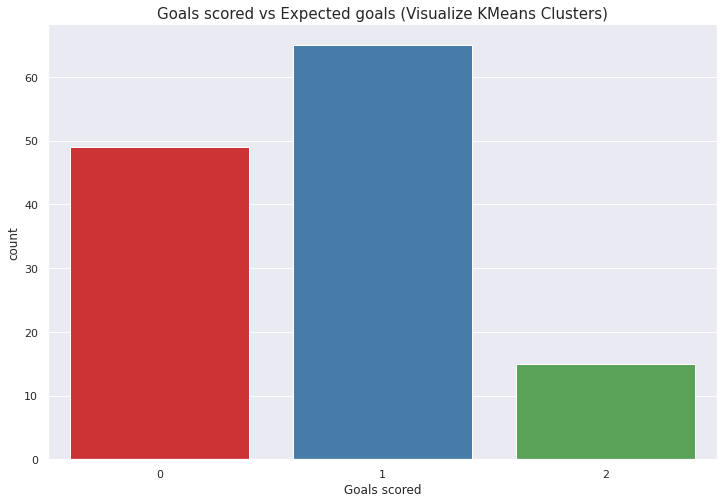

In [64]:
# To plot the counplot of different clusters
plt.figure(figsize=(12,8))
sns.countplot(x=df_updated_data['KM_Clusters'], data=df_updated_data, palette='Set1')
plt.title("K-Means Clusters", fontsize=15)
plt.xlabel("Clusters", fontsize=12)
plt.show()

# Using PCA to visualise and improve results

PCA (Principal Component Analysis) is a fundamental dimensionality reduction technique used to combine features in X in linear combinations such that each new component captures the most information or variance of the data. n_componentsis usually small, say at 3, where it can be used for data visualisation, data compression and exploratory analysis.

Before I fit a PCA model to the data, I'll standardise the data using Scikit-Learn's StandardScaler class.

In [65]:
# To drop the unwanted features that adds nothing to the information
pca_data = new_shoot_data.copy()
pca_data.drop(['Player','Nation','Pos','PKatt','KM_Clusters'], axis=1, inplace=True)
pca_data.head()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,2017,25,32.3,32,142,65,45.8,4.40,2.01,0.22,0.48,15.0,4,1,24.4,22.9,0.16,7.6,8.1
1,2017,25,30.7,15,84,37,44.0,2.74,1.21,0.17,0.38,16.5,0,1,12.1,11.4,0.14,2.9,2.6
2,2017,25,24.3,10,70,26,37.1,2.88,1.07,0.14,0.38,14.7,0,0,10.4,10.4,0.15,-0.4,-0.4
3,2017,26,26.5,1,38,8,21.1,1.43,0.30,0.03,0.13,18.3,1,0,2.5,2.5,0.07,-1.5,-1.5
4,2017,27,24.1,1,15,3,20.0,0.62,0.12,0.07,0.33,22.5,1,0,1.0,0.8,0.05,0.0,0.2


In [66]:
pca_data.shape

(129, 19)

In [67]:
# To standarise the data
pca_scaler = StandardScaler()
pca_scaled_data = pca_scaler.fit_transform(pca_data)

In [68]:
# To perform the PCA 
from sklearn.decomposition import PCA

# 0.95 to check how many principal components make a variance of 95%.
pca = PCA(n_components=0.95)
components = pca.fit(pca_scaled_data).transform(pca_scaled_data)
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 10


In [69]:
# To check the shape of the components
components.shape

(129, 10)

Text(0, 0.5, 'Explained Variance Ratio')

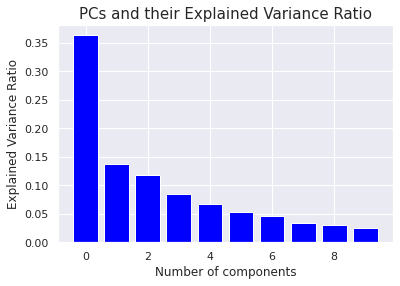

In [70]:
# Plot to explained variance ratio for each PC
var = pca.explained_variance_ratio_

plt.bar([i for i, _ in enumerate(var)],var,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

Typically, we want the explained variance to be between 95-99%. Therefore, for that total number of components should be 10.

In [71]:
# Percentage of variance explained for each components
print("Explained variance ratio: %s" % str(pca.explained_variance_ratio_))

Explained variance ratio: [0.36326178 0.13725298 0.11785103 0.08511827 0.06769974 0.05323764
 0.04661155 0.03298008 0.02976762 0.02573994]


In [72]:
# Cumulative Variance explained by each PC
cumulative_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumulative_var)

[36.33 50.06 61.85 70.36 77.13 82.45 87.11 90.41 93.39 95.96]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

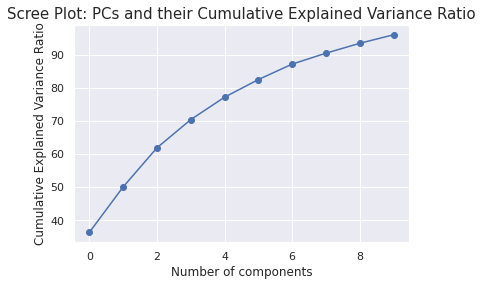

In [73]:
# Scree plot
plt.plot(cumulative_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

In [75]:
# To show PC (Principal Component) data decomposition
col_names = list(pca_data.columns)
pca_df = pd.DataFrame({ 'Features':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8], 'PC10':pca.components_[9]})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Season,0.001729,0.031328,0.133862,-0.163378,-0.085174,0.813553,0.498025,-0.135086,-0.025937,0.046867
1,Age,0.072957,-0.066859,-0.140780,-0.495072,0.143904,0.245952,-0.492482,-0.249287,0.307937,-0.474470
2,90s,0.193421,-0.266990,-0.104052,-0.193076,0.309870,-0.150734,0.200145,-0.409984,0.207759,0.329540
3,Gls,0.360467,-0.152658,-0.026346,0.051774,-0.139237,0.011735,-0.022952,-0.005772,-0.098222,-0.031093
4,Sh,0.346858,-0.210236,0.101852,-0.000750,0.050790,-0.037058,0.064120,-0.017567,-0.093399,-0.066345
5,SoT,0.354981,-0.177347,0.069051,0.028637,-0.051094,-0.059438,0.037457,-0.072216,-0.093386,-0.016209
6,SoT%,0.209595,0.389488,0.021690,-0.073068,0.122334,-0.128225,0.002843,-0.218324,0.296821,0.375590
7,Sh/90,0.233947,0.306737,0.295955,0.181998,0.021408,0.103769,-0.096154,0.051865,-0.081084,-0.238997
8,SoT/90,0.178938,0.392431,0.285268,0.207068,-0.081226,0.043328,-0.037265,-0.145248,0.243554,-0.043307
9,G/Sh,0.170060,0.276024,-0.337898,-0.300700,0.001049,-0.068621,0.255752,0.192509,-0.005870,0.160133


In [76]:
pca_df.shape

(19, 11)

In [77]:
# To run the KMeans again after performing PCA
pca_kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
pca_kmeans_3.fit(pca_scaled_data)

# predictions for pca scaled data
y_num = pca_kmeans_3.predict(pca_scaled_data)

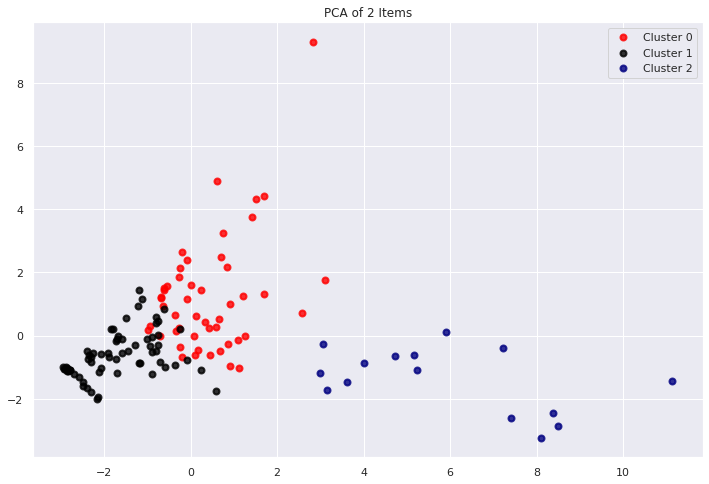

In [78]:
# To visualise the data after running PCA
targets = ['Cluster 0','Cluster 1','Cluster 2']

# Plotting the data
plt.figure(figsize=(12,8))
colors = ['red','black','navy']
lw = 2

for color, i, target in zip(colors, [0,1,2], targets):
    plt.scatter(x=components[y_num==i,0], y=components[y_num==i,1], color=color, alpha=.8, lw=lw, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 2 Items')
plt.show()

We can see, the variance explained by first and second principal components are nearly 36.33% and 13.72% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [79]:
# Running PCA again with total 10 components
pca = PCA(n_components=10, random_state=42)
X = pca.fit(pca_scaled_data).transform(pca_scaled_data)

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss2.append(kmeans.inertia_)

Saving figure 03_Elbow_point2


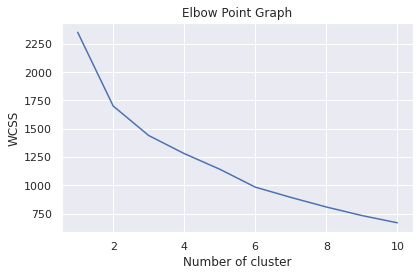

In [80]:
# To check the updated elbow point graph
sns.set()
plt.plot(range(1,11), wcss2)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
save_fig("03_Elbow_point2")
plt.show()

In [81]:
# To check the updated value of inertia for clusters after PCA
wcss2

[2351.785023555323,
 1700.1763464344938,
 1439.6995334841613,
 1280.2548627743374,
 1142.0580162267706,
 984.0279299683996,
 893.3758651802904,
 808.6373024835706,
 733.0959634314287,
 669.0294899138704]

In conclusion we managed to improve our results by reducing inertia.

In [83]:
new_shoot_data.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,KM_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1,2
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6,2
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4,2
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5,1
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2,1


Saving figure 03_KM_cluster


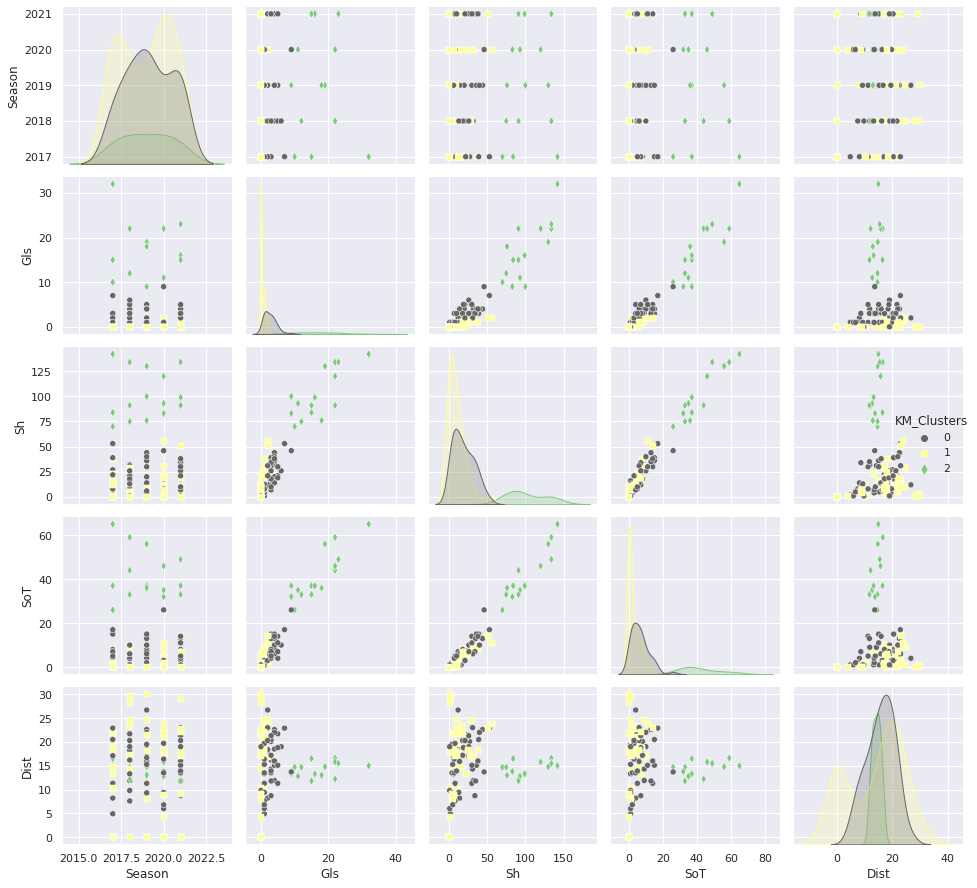

In [127]:
# To plot the clusterting distribution of all the important features
sns.set_style("darkgrid")
sns.pairplot(data=new_shoot_data, x_vars=['Season','Gls','Sh','SoT','Dist'],
             y_vars=['Season','Gls','Sh','SoT','Dist'], hue='KM_Clusters', 
             palette='Accent_r', markers=['o','s','d'])
save_fig("03_KM_cluster")

Let us determine the common qualities that players share with each cluster in K-Means Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster scored between 0 to 10 goals every season 
- Players in this cluster shoots the ball between 0 to 50 times towards the goal each season
- Players in this cluster shoots the ball on target between 0 to 25 times each season
- Players in this cluster shoots the ball from 5 to 30 yards from the opponent's goal post

Cluster 1 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster rarely scored any goals each season 
- Players in this cluster shoots the ball between 0 to 50 times towards the goal each season
- Players in this cluster shoots the ball on target between 0 to 18 times each season
- Players in this cluster shoots the ball from 0 to 30 yards from the opponent's goal post

Cluster 2 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster scored between 10 to 32 goals every season  
- Players in this cluster shoots the ball between 70 to 140 times towards the goal each season
- Players in this cluster shoots the ball on target between 25 to 65 times each season
- Players in this cluster shoots the ball from 10 to 20 yards from the opponent's goal post

In [128]:
# To export K-Means clustering results
new_shoot_data.to_csv("03_clustering_results.csv", index=False)

# Using DBSCAN 

DBSCAN is a density-based approach to spatial clustering. It views clusters as areas of high density separated by areas of low density. This approach has several advantages; whereas K Means focuses on finding centroids and assoicating data points with that centroid in a spherical manner, the DBSCAN algorithm can identify clusters of any convex shape. Additionally, DBSCAN is robust to areas of low density.

In [85]:
df_check_data = pd.DataFrame(pca_scaled_data)
col_li = list(pca_data.columns)
df_check_data.columns = col_li
df_check_data.head()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,-1.41763,-0.075023,1.329671,5.069952,3.709839,4.238088,0.885534,1.818565,1.313194,1.045248,0.786608,0.055476,1.493573,0.929503,4.133557,4.205879,1.014904,5.213376,5.567259
1,-1.41763,-0.075023,1.197517,2.079526,1.883119,2.135633,0.800426,0.746884,0.564042,0.637885,0.424723,0.251722,-0.311307,0.929503,1.756953,1.795440,0.729358,1.914962,1.723006
2,-1.41763,-0.075023,0.668901,1.199989,1.442186,1.309669,0.474178,0.837266,0.432940,0.393468,0.424723,0.016227,-0.311307,-0.246045,1.428479,1.585837,0.872131,-0.400945,-0.373860
3,-1.41763,0.179660,0.850613,-0.383178,0.434341,-0.041909,-0.282337,-0.098840,-0.288119,-0.502729,-0.479988,0.487217,0.139913,-0.246045,-0.097958,-0.070030,-0.270051,-1.172915,-1.142710
4,-1.41763,0.434342,0.652382,-0.383178,-0.290049,-0.417348,-0.334348,-0.621769,-0.456678,-0.176840,0.243781,1.036705,0.139913,-0.246045,-0.387788,-0.426356,-0.555596,-0.120229,0.045513


In [235]:
# min points = 2 because larger values is for large data, noisy data or data that containse many duplicates
from sklearn.cluster import DBSCAN

# a minimum minPts can be derived from the number of dimensions D in the data set, as minPts = D + 1. 
# The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. 
# With minPts = 2, the result will be the same as of hierarchical clustering with the single link metric, 
# with the dendrogram cut at height e. Therefore, minPts must be chosen at least 3.
dbs = DBSCAN(eps=2, min_samples=4)

# Where -1 indicates they are the outliers (do not fall in any clusters)
dbs_model = dbs.fit(pca_scaled_data)
labels = dbs_model.labels_
labels

array([-1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,
       -1,  0,  1, -1,  0,  0,  0, -1,  1,  0,  0, -1,  0, -1, -1,  0,  0,
       -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  1, -1,
        1,  0, -1,  1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,  0, -1,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0, -1,  0, -1,  0, -1, -1,  0])

In [236]:
# identifying the points which makes up core points
cores = np.zeros_like(labels, dtype=bool)
cores[dbs.core_sample_indices_] = True

# calculating the number of clusters
dbs_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters are: ", dbs_clusters)

Number of clusters are:  2


In [237]:
# to calculate silhouetter score
print(silhouette_score(pca_scaled_data, labels))

0.060818349084035155


In [238]:
# To see the the amount of data divided into clusters
pd.Series(dbs_model.labels_).value_counts()

 0    75
-1    49
 1     5
dtype: int64

It can be seen that 62.01% of data points have been labelled to the first two clusters.

In [239]:
# save the cluster labels and sort by cluster
data_copy = new_shoot_data.copy()
data_copy = data_copy.drop('KM_Clusters', axis=1)
data_copy['DB_clusters'] = dbs.labels_

In [240]:
# To review the cluster centers
data_copy.groupby('DB_clusters').mean()

,Season,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
DB_clusters,,,,,,,,,,,,,,,,,,,,
-1,2019.020408,25.122449,17.910204,6.795918,43.693878,16.979592,41.087755,2.709796,1.219796,0.150612,0.353878,16.524490,1.571429,0.55102,0.591837,6.375510,5.924490,0.136735,0.420408,0.320408
0,2019.080000,25.200000,15.536000,0.960000,12.626667,3.560000,18.478667,0.887067,0.234933,0.046933,0.153867,13.266667,0.160000,0.00000,0.000000,0.949333,0.946667,0.054933,0.010667,0.013333
1,2018.600000,28.400000,9.440000,1.000000,7.000000,1.000000,18.600000,0.982000,0.200000,0.186000,1.000000,15.120000,0.000000,0.00000,0.000000,0.860000,0.860000,0.130000,0.140000,0.140000


Saving figure 03_DBSCAN_cluster


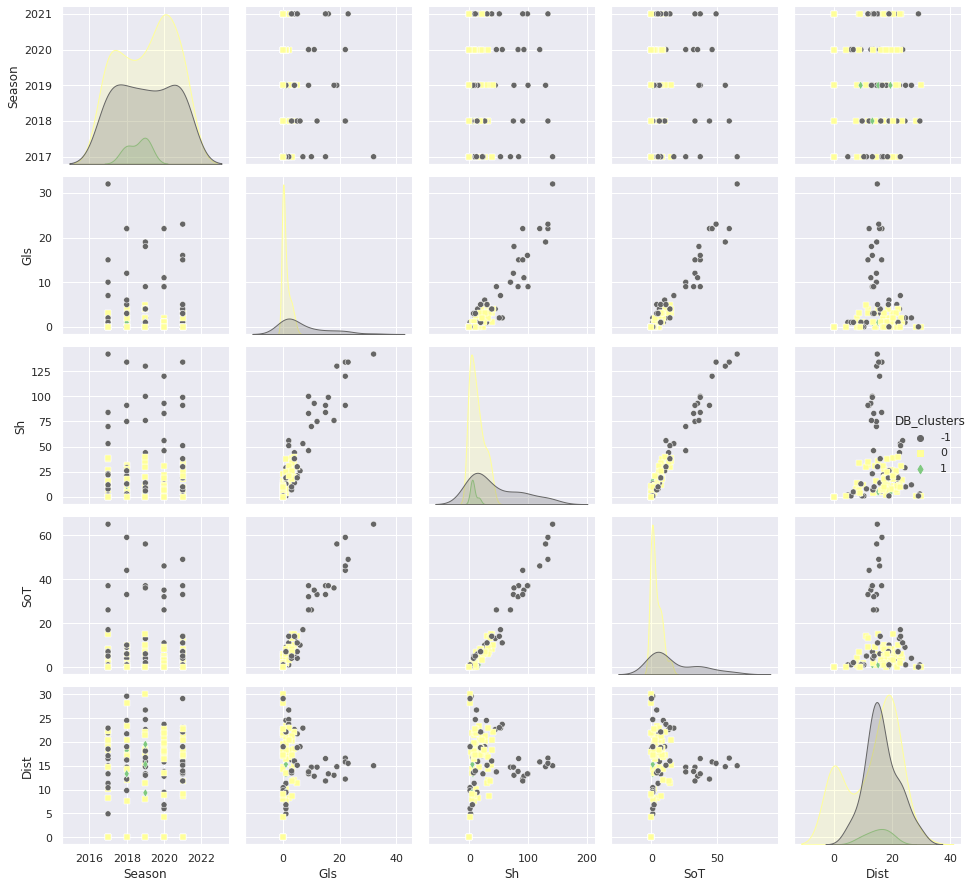

In [242]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=data_copy, x_vars=['Season','Gls','Sh','SoT','Dist'],
             y_vars=['Season','Gls','Sh','SoT','Dist'], hue='DB_clusters', 
             palette='Accent_r', markers=['o','s','d'])
save_fig("03_DBSCAN_cluster")

Let us determine the common qualities that players share with each cluster in DBSCAN Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster scored between 0 to 5 goals every season 
- Players in this cluster shoots the ball between 0 to 50 times towards the goal each season
- Players in this cluster shoots the ball on target between 0 to 20 times each season
- Players in this cluster shoots the ball from 0 to 30 yards from the opponent's goal post

Cluster 1 traits:
- Players in this cluster have played seasons before 2020
- Players in this cluster rarely scored any goals each season 
- Players in this cluster shoots the ball between 0 to 10 times towards the goal each season
- Players in this cluster shoots the ball on target between 0 to 5 times each season
- Players in this cluster shoots the ball from 0 to 30 yards from the opponent's goal post

The value -1 above means that they don't fit into any clusters and can be thought of as an outlier. There were total of 49 outliers out of 129 instances.

In [250]:
#Export hierarchical clustering results
data_copy.to_csv('03_DBSCAN_Results.csv', index=False)

In [ ]:
# Done DBSCAN

# Hierarchical Clustering
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

Method-1: Dendrogram Plotting using Clustermap

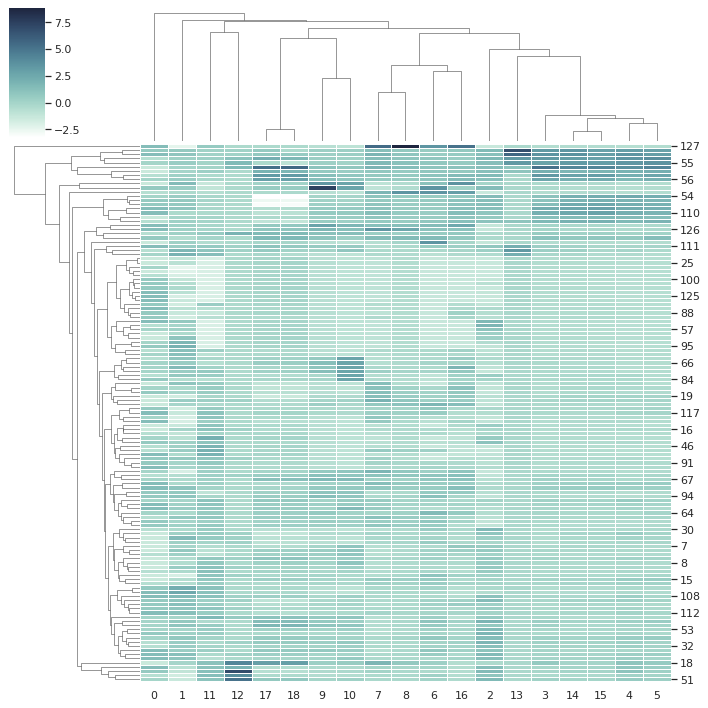

In [115]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(pca_scaled_data, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Method-2: Dendrogram Plotting using Ward's Method

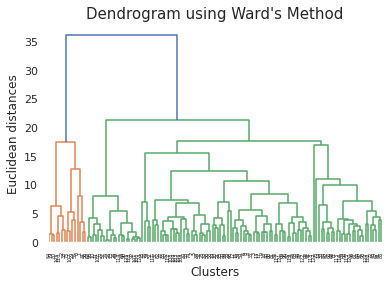

In [116]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(pca_scaled_data, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

We can see 2 prominent clusters here (orange, green, red, violet). We will now follow the similar process of labelling data with cluster ids, then visualize the 2 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [117]:
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
Y_hc = hier_clust.fit_predict(pca_scaled_data)

In [118]:
Y_hc

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
pd.Series(hier_clust.labels_).value_counts()

0    114
1     15
dtype: int64

In [244]:
# save the cluster labels
data_hc = new_shoot_data.copy()
data_hc = data_hc.drop('KM_Clusters', axis=1)
data_hc['Hier_clusters'] = hier_clust.labels_
data_hc.head()

,Season,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Hier_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,32,142,65,45.8,...,15.0,4,1,2,24.4,22.9,0.16,7.6,8.1,1
1,2017,Roberto Firmino,br BRA,FW,25,30.7,15,84,37,44.0,...,16.5,0,1,1,12.1,11.4,0.14,2.9,2.6,1
2,2017,Sadio Mané,sn SEN,FW,25,24.3,10,70,26,37.1,...,14.7,0,0,0,10.4,10.4,0.15,-0.4,-0.4,1
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,1,38,8,21.1,...,18.3,1,0,0,2.5,2.5,0.07,-1.5,-1.5,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,1,15,3,20.0,...,22.5,1,0,0,1.0,0.8,0.05,0.0,0.2,0


Saving figure 03_Hierar_cluster


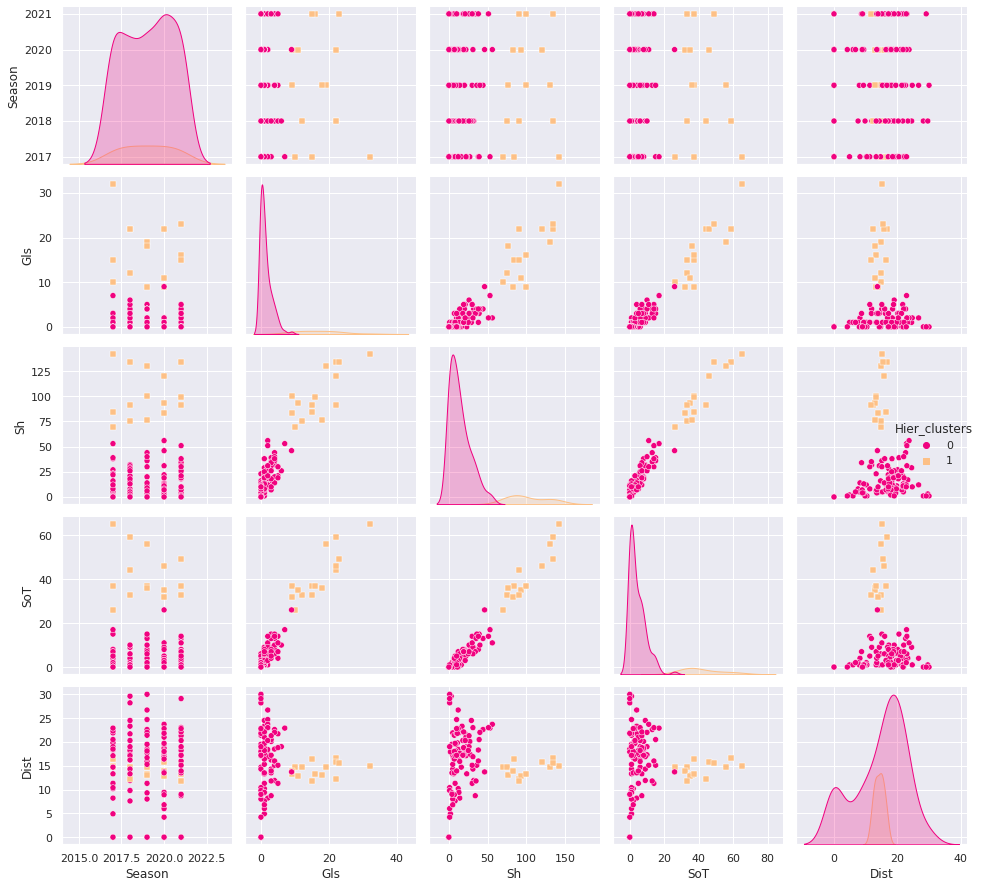

In [247]:
# To plot the clusterting distribution of all the important features
#sns.set_style("darkgrid")
sns.pairplot(data=data_hc, x_vars=['Season','Gls','Sh','SoT','Dist'],
             y_vars=['Season','Gls','Sh','SoT','Dist'], hue='Hier_clusters', 
             palette='Accent_r', markers=['o','s'])
save_fig("03_Hierar_cluster")

Let us determine the common qualities that players share with each cluster in Hierarchical Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster scored between 0 to 10 goals every season 
- Players in this cluster shoots the ball between 0 to 50 times towards the goal each season
- Players in this cluster shoots the ball on target between 0 to 25 times each season
- Players in this cluster shoots the ball from 0 to 30 yards from the opponent's goal post

Cluster 1 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster scored between 10 to 32 goals every season 
- Players in this cluster shoots the ball between 70 to 140 times towards the goal each season
- Players in this cluster shoots the ball on target between 25 to 65 times each season
- Players in this cluster shoots the ball from 12 to 18 yards from the opponent's goal post


In [249]:
# To export hierarchical clustering results
data_hc.to_csv('03_Hierchical_Results.csv', index=False)